In [1]:
using LogicCircuits

In [28]:
function FindRightmostVarVtree(vt)
    stopping = false
    rightmost = -1
    v = vt
    while !stopping
        v = v.right
        if typeof(v) == PlainVtreeLeafNode
            stopping = true
            rightmost = v.var
        end
    end
    return rightmost
end

FindRightmostVarVtree (generic function with 1 method)

The rightmost variable is 13


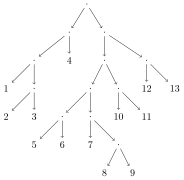

In [30]:
vtree = PlainVtree(13, :random)
println("The rightmost variable is ",FindRightmostVarVtree(vtree))
plot(vtree)

In [41]:
function l_revision(sdd,vtree)
    VERBOSE = false
    rightmost = FindRightmostVarVtree(vtree)
    println("-",rightmost[1])
    circuit = PlainLogicCircuit(sdd)
    root = circuit
    current = circuit
    parent = circuit
    visited = Any[]
    parents = Any[]
    stopping = false
    while !stopping
        if typeof(current) == Plain⋁Node
            for i = 1:length(current.children)
                if !(current.children[i] in visited)
                    push!(parents,current)
                    current = current.children[i]
                    push!(visited,current)
                    break
                end
                if i == length(current.children)
                    if current == root
                        stopping = true
                    end
                    for i = 1:length(visited)
                        if current == visited[i]
                            current = parents[i]
                            break
                        end
                    end
                end 
            end
        elseif typeof(current) == Plain⋀Node
            if !(current.children[1] in visited)
                push!(parents,current)
                current = current.children[1]
                push!(visited,current)
            elseif !(current.children[2] in visited)
                push!(parents,current)
                current = current.children[2]
                push!(visited,current)
            else
                for i = 1:length(visited)
                    if current == visited[i]
                        current = parents[i]
                        break
                    end
                end
            end
        else 
            if typeof(current) == PlainLiteralNode
                VERBOSE && println("L",current.literal)
                if abs(current.literal) == rightmost
                    piece = PlainLogicCircuit(-current.literal)
                    circuit = replace_node(circuit,current,piece)
                end
            elseif typeof(current) == PlainTrueNode
                VERBOSE && println("T")
            elseif typeof(current) == PlainFalseNode
                VERBOSE && println("F")    
            end
            for i = 1:length(visited)
                if current == visited[i]
                    current = parents[i]
                    break
                end
            end
        end
    end
    return circuit
end

l_revision (generic function with 1 method)

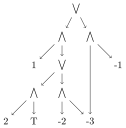

In [39]:
sun, rain, rainbow = pos_literals(LogicCircuit, 3)
formula = (rainbow & sun & rain) | (-rainbow); # rainbow implies sun and rain
vtree = PlainVtree(3, :balanced)
#:rightlinear, :leftlinear, :random, :balanced
manager = SddMgr(vtree)
sdd = compile(manager, formula);
plot(sdd)

-3
L1
L2
T
L-2
L-3
L-1


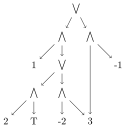

In [40]:
plot(l_revision(sdd,vtree))